## 지도학습

* 분류 RandomForestClassifier
* 회귀 RandomForestRegression

랜덤포레스트는 어떤  의사결정트리의 점을 개선? 의사결정트리의 과적한 문제를 해결

앙상블(RandomForest)
1) 여러개의 모델을 만든다. 
2) 각각의 모델은 약간씩 다르게 만든다.
- feature을 사용하는 개수를 일부로 한정시킨다.(30-70개 정도)
- 의사결정트리도 약간씩 다른 데이터를 내부적으로 사용한다.(데이터 개수는 동일)

3) 모델예측

* 10개 모델을 어떻게 예측하는가?
- 새로운 데이터 100개가 들어온다. 100개에 대한 예측값을 한다.
- 100개 각각의 예측값을 평균(회귀)으로 예측
- 100개 각각의 예측값의 많이 나온값(최빈값)으로 예측.


### 결정트리 decision tree
는 분류와 회귀 문제에 널리 사용하는 모델이다. 
기본적으로 결정트리는 결정에 다다르기 위해 예/아니오 이어 나가면서 학습한다.


먼저 여러개의 모델을 만들고, 그 중에서 랜덤하게 N개를 뽑고 
최빈값으로 하고 
수치형은 평준값으로 

분류 

In [1]:
import platform
import matplotlib
from matplotlib import font_manager


In [2]:
# 한글 및 마이너스 표시 설정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
 font_name = font_manager.FontProperties(fname=path).get_name()
 matplotlib.rc('font', family=font_name)
elif platform.system()=="Darwin":
 rc('font', family='AppleGothic')
else:
 print("Unknown System")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline


## 01 랜덤 포레스트 모델 만들기

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

* 랜덤 포레스트는 여러개의 모델 이용이 가능하다.
* n_estimators 를 이용
* 랜덤 포레스트는 각각의 모델별 변수 선택을 제한할 수 있다.

In [15]:
# 01 데이터 셋 불러오기
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
import mglearn

cancer = load_breast_cancer()
X = cancer.data  #입력
y = cancer.target # 출력 


In [16]:
# 02 데이터 셋 나누기 및 학습
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                                    stratify=cancer.target, random_state=42)

In [17]:
# 03 트리5개로 구성된 랜덤 포레스트 모델 만들기
model = RandomForestClassifier(n_estimators=5, random_state=0) # 5개의 트리
model.fit(X_train, y_train)  #모델 학습

print("학습용 세트 정확도 : {:.3f}".format(model.score(X_train, y_train))) # score가 분류문제에서는 정확도가 찍히고, 회기문제에서는 결정도가 찍힘
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))  #

학습용 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


In [11]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315)]

### * 여러개(5개)의 의사결정 모델을 만들어서  비교

In [18]:
# 5개의 모델에 대한 정확도 평가
for one_model in model.estimators_:
 print("학습용 세트 정확도 : {:.3f}".format(one_model.score(X_train, y_train)))
 print("테스트 세트 정확도 : {:.3f}".format(one_model.score(X_test, y_test)))
 print()

# outcome 해석: 4번째 모델 성능이 가장 좋다.(1과 가장가까운것.) 그러나 0,1,0,1,0 이면 0이 더 많으니까 결과적으로는 0

학습용 세트 정확도 : 0.969
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.960
테스트 세트 정확도 : 0.916

학습용 세트 정확도 : 0.955
테스트 세트 정확도 : 0.916

학습용 세트 정확도 : 0.974
테스트 세트 정확도 : 0.958

학습용 세트 정확도 : 0.969
테스트 세트 정확도 : 0.909



### 실습_10개 모델 만들기

In [16]:
model = RandomForestClassifier(n_estimators=10, random_state=0) # 5개의 트리
model.fit(X_train, y_train)  #모델 학습

print("학습용 세트 정확도 : {:.3f}".format(model.score(X_train, y_train))) # score가 분류문제에서는 정확도가 찍히고, 회기문제에서는 결정도가 찍힘
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))  #

학습용 세트 정확도 : 1.000
테스트 세트 정확도 : 0.951


In [18]:
model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035)]

In [19]:
# 10개의 모델에 대한 정확도 평가
for one_model in model.estimators_:
 print("학습용 세트 정확도 : {:.3f}".format(one_model.score(X_train, y_train)))
 print("테스트 세트 정확도 : {:.3f}".format(one_model.score(X_test, y_test)))
 print()


# outcome 해석: 첫번째 데이터(학습용 데이터) 9번째 모델 성능이 제일 좋으나, 결론적으로 0,0,0,1,1,1,1,0,1,0으로 0이 가장 많으니 0
# 두번째 데이터(테스트 데이터)는 0,0,0,1,0,1,1,0,1,0

학습용 세트 정확도 : 0.969
테스트 세트 정확도 : 0.937

학습용 세트 정확도 : 0.960
테스트 세트 정확도 : 0.916

학습용 세트 정확도 : 0.955
테스트 세트 정확도 : 0.916

학습용 세트 정확도 : 0.974
테스트 세트 정확도 : 0.958

학습용 세트 정확도 : 0.969
테스트 세트 정확도 : 0.909

학습용 세트 정확도 : 0.962
테스트 세트 정확도 : 0.958

학습용 세트 정확도 : 0.969
테스트 세트 정확도 : 0.958

학습용 세트 정확도 : 0.974
테스트 세트 정확도 : 0.902

학습용 세트 정확도 : 0.979
테스트 세트 정확도 : 0.951

학습용 세트 정확도 : 0.960
테스트 세트 정확도 : 0.881



### 모델의 정보 확인

In [20]:
print(model.feature_importances_) # 모델의 중요도

print(model.n_features_) # 모델 사용 특징

[2.38572201e-02 1.13637552e-02 3.21323723e-02 1.10525550e-03
 1.69027497e-03 6.51901184e-03 1.29749158e-01 1.56830768e-01
 3.78332153e-03 7.89941578e-03 1.44053220e-02 2.58418224e-03
 7.87257799e-03 1.50182281e-01 0.00000000e+00 3.05198826e-05
 0.00000000e+00 1.23001285e-02 9.01225218e-03 7.58788872e-03
 1.36518198e-02 1.48199173e-02 3.51684929e-02 1.13937789e-02
 4.46089783e-03 5.77613249e-03 2.69878933e-02 2.88342217e-01
 1.98701265e-02 6.23017924e-04]
30


In [21]:
# model : 모델
# 데이터 셋
def plot_feature_important_common(model, dataset, col_names):
 imp = model.feature_importances_ # feature의 중요도
 n_features = dataset.shape[1]
 feature_names = col_names
 plt.barh(range(n_features) , imp, align='center') # 그래프(가로 막대 그래프)

 plt.yticks(np.arange(n_features), feature_names) # y축 값 지정
 plt.xlabel("feature importance")
 plt.ylabel("feature")
 plt.ylim(-1, n_features) 


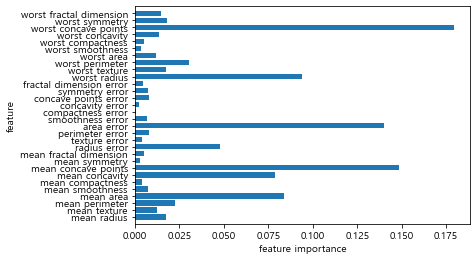

In [22]:
n_fea = cancer.data.shape[1]
plot_feature_important_common(model, cancer.data, cancer.feature_names)

### 유방암 데이터셋에 100개의 트리로 이루어진 랜덤 포레스트 적용해 보기

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                                    stratify=cancer.target, random_state=42)

In [6]:
model = RandomForestClassifier(n_estimators=100, random_state=0) # 5개의 트리
model.fit(X_train, y_train)  #모델 학습

print("학습용 세트 정확도 : {:.3f}".format(model.score(X_train, y_train))) # score가 분류문제에서는 정확도가 찍히고, 회기문제에서는 결정도가 찍힘
print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))  #

학습용 세트 정확도 : 1.000
테스트 세트 정확도 : 0.958


### 실습 1-2

* tree의 수를 100개로 해 보고, 모델 만들고, 정보확인해보기

### 02 모델 정보 시각화
* 입력 : 100개 2열
* 출력 : 100개 준비
* 이 데이터 셋을 기준으로 모델을 만든다.
* 랜덤 포레스트의 모델개수 5개

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
m = RandomForestClassifier(n_estimators=5, random_state=2) # 5개의 트리
m.fit(X_train, y_train)

(100, 2) (100,)


RandomForestClassifier(n_estimators=5, random_state=2)

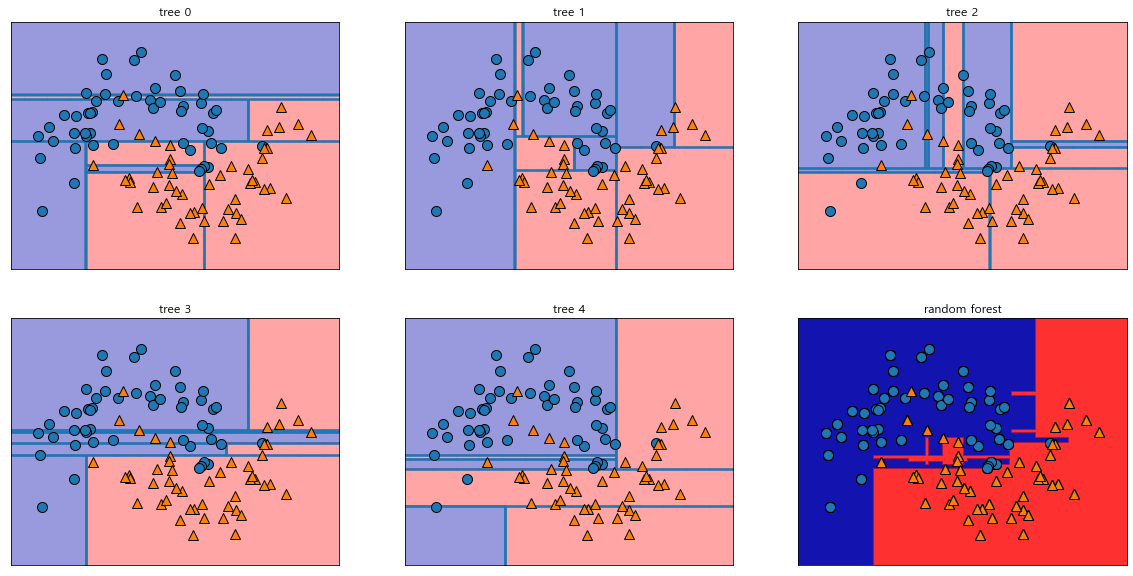

In [24]:
fig, axes = plt.subplots(2,3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), m.estimators_)):
 ax.set_title("tree {}".format(i)) # 각 그래프 제목

 # 그래프 그리기
 mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
 mglearn.plots.plot_2d_separator(m, X, fill=True, ax=axes[-1,-1], alpha=.4)
 axes[-1, -1].set_title("random forest")

 mglearn.discrete_scatter(X[:, 0],X[:,1], y)

### 실습 2-3 랜덤포레스트의 모델 개수를 10개로 해서 확인해 보자.

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
m = RandomForestClassifier(n_estimators=10, random_state=2) # 10개의 트리
m.fit(X_train, y_train)

(100, 2) (100,)


RandomForestClassifier(n_estimators=10, random_state=2)

In [27]:
#feature를 무작위로 N개 뽑아낸다.

model.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035)]

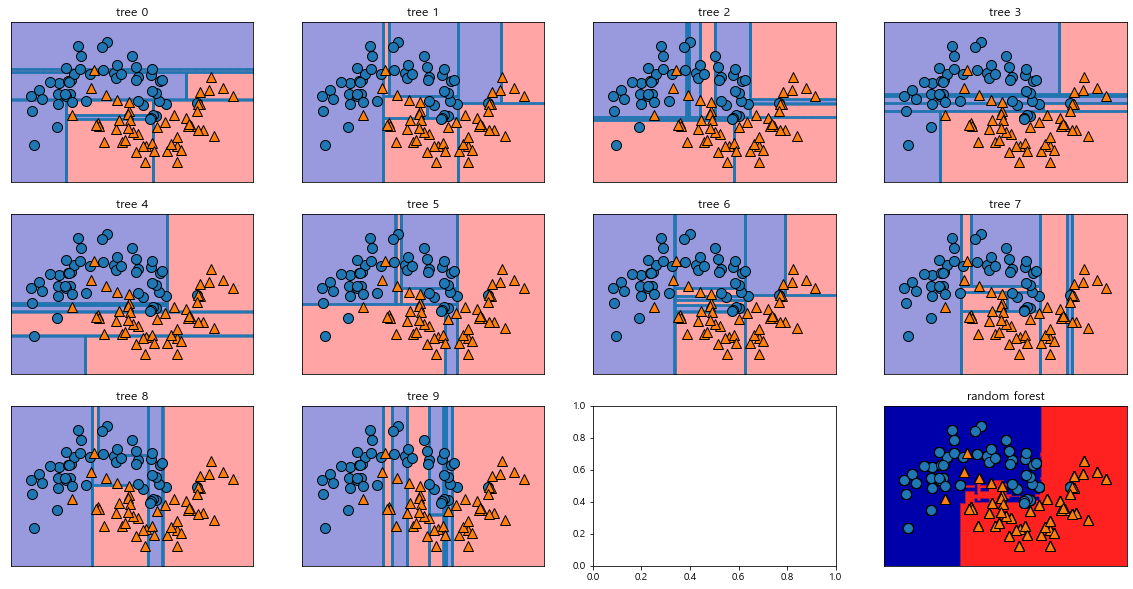

In [26]:
fig, axes = plt.subplots(3,4, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), m.estimators_)):
 ax.set_title("tree {}".format(i)) # 각 그래프 제목

 # 그래프 그리기
 mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
 mglearn.plots.plot_2d_separator(m, X, fill=True, ax=axes[-1,-1], alpha=.4)
 axes[-1, -1].set_title("random forest")

 mglearn.discrete_scatter(X[:, 0],X[:,1], y)

## enumerate 이해

In [28]:
for i, name in enumerate(['body', 'foo', 'bar']):
 print(i, name)


0 body
1 foo
2 bar
